#기초통계와 회귀분석(2부)

**다음 조건들이 만족되면 OLS 추정치가 BLUE(Best Linear Unbiased Estimator)**
--

- **(가정1) 실제모형이 추정모형과 마찬가지로 선형이다.**
- **(가정2) 오차항의 조건부 기댓값 $E(e_i|x_i)=0$이다. 이는 $cov(x_i, e_i)=0$을 의미한다.**
- **(가정3) 오차항의 조건부 분산 $var(e_i|x_i)$은 모든 $i$에 대해 동일하다.(동분산성).즉, $var(e_i|x_i)=\sigma^2 이다.$**
- **(가정4) 두 개의 서로 다른 오차항 $e_i$와 $e_j$는 서로 독립이다. 즉, $cov(e_i, e_j)=0$이다.**
- **(가정5) 오차항 $e_i$는 정규분포를 따른다. 즉, $e_i|x_i ~ N(0, \sigma^2)$이다.**
- **(가정6) (상수항을 포함하여) 설명변수들 간에 완전한 선형관계가 없어야 한다.** 

자기상관 탐지 (가정 4 검정)
--

- **(가정4) 두 개의 서로 다른 오차항 $e_i$와 $e_j$는 서로 독립이다. 즉, $cov(e_i, e_j)=0$이다.**

- **시계열 데이터에서 빈번하게 발생**

**검정통계량을 이용한 검정:Durbin-Watson검정 (1계 자기상관 검정)**

- DW 검정통계량은 $\hat{e_t} = \rho \hat{e}_{t-1} +v_t $에서 $2(1-\hat{\rho})$와 가까운 값을 갖는다. 따라서 자기상관이 없으면 (즉, $\rho$이 0에 가까우면) DW는 2에 가까운 값을 갖는다.

- DW가 0에 가까우면 자기상관이 높다.

- DW가 2에 가까우면 자기상관이 낮다.

- DW가 4에 가까우면 음의 자기상관이 있다.

> **IN STATA**
- estat dwatson

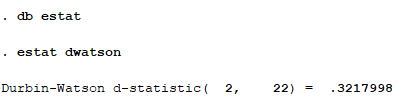



**검정통계량을 이용한 검정: Durbin's alternative 검정($p$계 자기상관 검정)**

>**IN STATA**

- reg consump wagegovt L.consump L2.consump

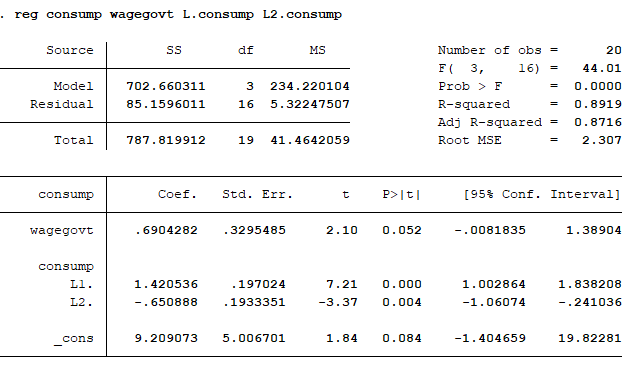

$\Rightarrow$ L.consump($consump_{t-1}$), L2.consump($consump_{t-2}$) 포함한 회귀분석

- estat durbinalt, lags(1/2) small

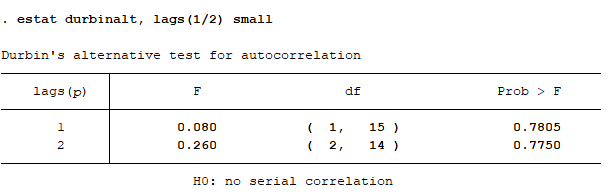

자기상관 고려한 추정
--

Durbin-Watson 검정은 AR(1)의 자기상관성만 측정하지, AR(P)까지 확정하지 못했다. 즉, 1계 계열 상관성만 확인할 수 있다는 단점이 존재한다. 

**Paris-Winsten 추정**

Paris-Winsten의 경우 회귀모형 양변에 $\sqrt{1-\rho^2}$을 곱하여 추정한다.

추가 참고자료: Study_at_PNU/Econometrics/계량경제학 13주차 과제.pdf

참고 링크: https://github.com/yunyoseob/Study_at_PNU/blob/main/Econometrics/%EA%B3%84%EB%9F%89%EA%B2%BD%EC%A0%9C%ED%95%99%2013%EC%A3%BC%EC%B0%A8%20%EA%B3%BC%EC%A0%9C.pdf

>**IN STATA**
- prais inv gnp interest

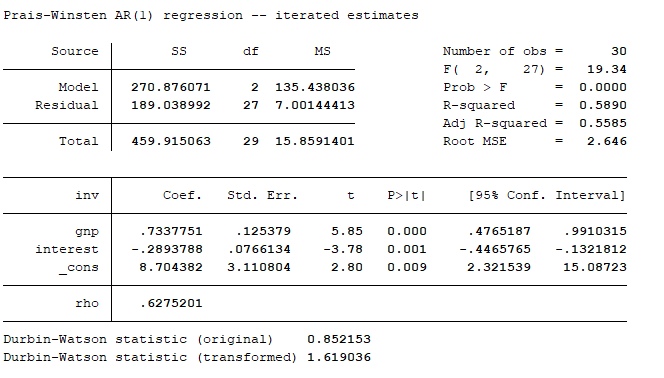







**Corchrane Orcutt 추정**

OLS가 갖는 추정방법의 한계성을 보완하면서 프라이스-윈스텐 방법이 갖는 추론상의 우수성을 보유하는 방법으로 OLS를 통해 베타값을 구한 뒤, 추정된 베타값을 원래 회귀식에 대입하여 새로운 회귀오차를 구하여 해결하는 방법이다.

>**IN STATA**

- prais inv gnp interset, **corc sse**

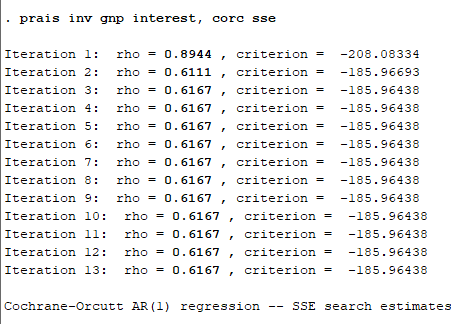


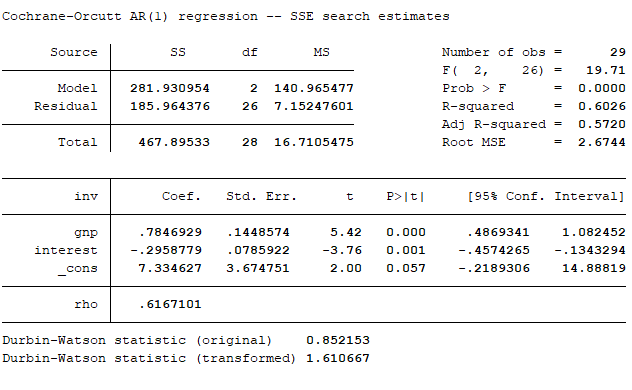



**Newey-West 표준오차 추정**

오차항에 이분산성과 자기상관이 존재하더라도 표준오차가 일치추정량이 되는 방법

>**IN STATA**
- db newey
- 대화창에서 Dependent variable: inv, Independent variables: gnp, interest 선택, Maximum lag는 2 선택

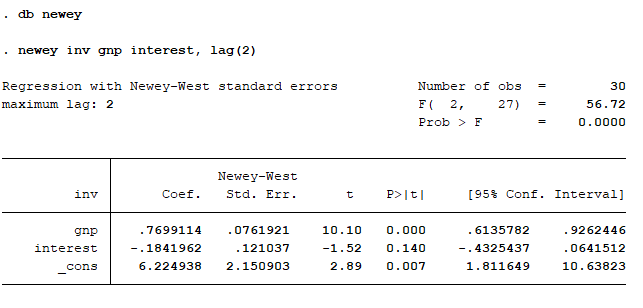

2단계 최소제곱추정법(2SLS: 2 stage least squares estimation)
--

OLS 추정량이 일치추정량(consistent estimator)이 되기 위해서는 설명변수와 오차항이 서로 독립이라는 가정이 필요함.

- (가정2) 오차항의 조건부 기댓값 $E(e_i|x_i)=0$이다. 이는 $cov(x_i, e_i)=0$을 의미한다.

**가정 2가 위배될 경우 설명변수($x_i$)는 외생적(exogenous) 변수가 아니라 내생적(endogenous) 변수가 되며 다음 세 가지 이유로 내생적이됨.**

1. 연립방적식 편의(simultaneous equation bias): 예컨대 수요.공급 모형의 경우

2. 측정오차 편이(measurement error bias)

3. 누락변수 편이(omitted variable bias)

$$ y_i= \beta_0 + \beta_1 x_i + e$$

- (1) 분편추정량(unbiased estimator): $E(\hat{\beta_1}=\beta_1$

- (2) 유효추정량(efficient estimator): $Var(\beta_1)=min\{Var(\hat{\beta}_1^1),Var(\hat{\beta}_1^2), \cdots, Var(\hat{\beta}_1^n)\}$ $\rightarrow$ 여기서 $\hat{{\beta}_1^1},\hat{{\beta}_1^2},\cdots,\hat{{\beta}_1^n}$은 모수 $\beta$에 대한 점추정량들

- (3) 일치추정량(consistent estimator): $plim\hat{\beta_1} = \beta_1$ $\rightarrow$ n이 커질수록 $\hat{\beta_1}$이 $\beta_1$에 근접한다는 의미임.

- 대수의 법칙에(law of large numbers)에 의하면 $plim \hat{\beta_1} = \beta + \frac{Cov(x_i, e_i)}{var(x_i)}$

**회귀모형에 내생적 설명변수가 존재할 경우 해결방법은 도구변수(IV; Instrumental variable) 이용하여 추정하자**

- 도구변수(IV)는 반드시 내생적 설명변수와는 상관관계가 있고 오차항과는 상관관계가 없어야 함. 도구변수 개수는 반드시 내생적 설명변수 개수보다 많거나 같아야 함.

**어느 도구변수가 더 적합한지 확인해보는 3가지 방식**

1. 방식1; 내생적 설명변수와 상관관계를 점검

2. 방식 2: 1단계 "지정변수" 추정결과와 비교

3. 도구변수의 적합성을 F검정

- 상황에 따라 도구변수를 두 개 이용할 수도 있음.

**설명변수 내생성에 대한 가설 검정**

설명변수 "변수"가 과연 내생적인지 가설검정할 필요가 있음(3가지 방식 가능)

**1. 방식 1: Hausman 검정 (가장 많이 쓰임)**

> Hausman(하우스만) 검정
- 귀무가설($H_0: cov(x_i, e_i) = 0$(외생적))
- 대립가설($H_1: cov(x_i, e_i) \neq 0$(내생적))

**2. 방식 2: Hausman 검정을 다음과 같이 2단계로 확인 가능**

> 1단계: 1단계로 내생적 변수인 "지정변수"추정

> 2단계: 이 모형의 잔차변수 "새로운 변수" 산출

> 지정변수와 새로운 변수를 모두 설명 변수로 포함하여 2단계 추정 후 새로운 변수의 추정계수의 p값이 방식 1의 Hausman 검정 통계량의 p값과 일치함을 확인.

**3. 방식 3: Durbin chi2와 Wu-Hausman F값을 이용한 내생성 검정**

>  귀무가설(지정변수가 외생적)을 유의수준에서 기각할지 결정

IN STATA(2SLS 실습)
--

**데이터 미리보기**

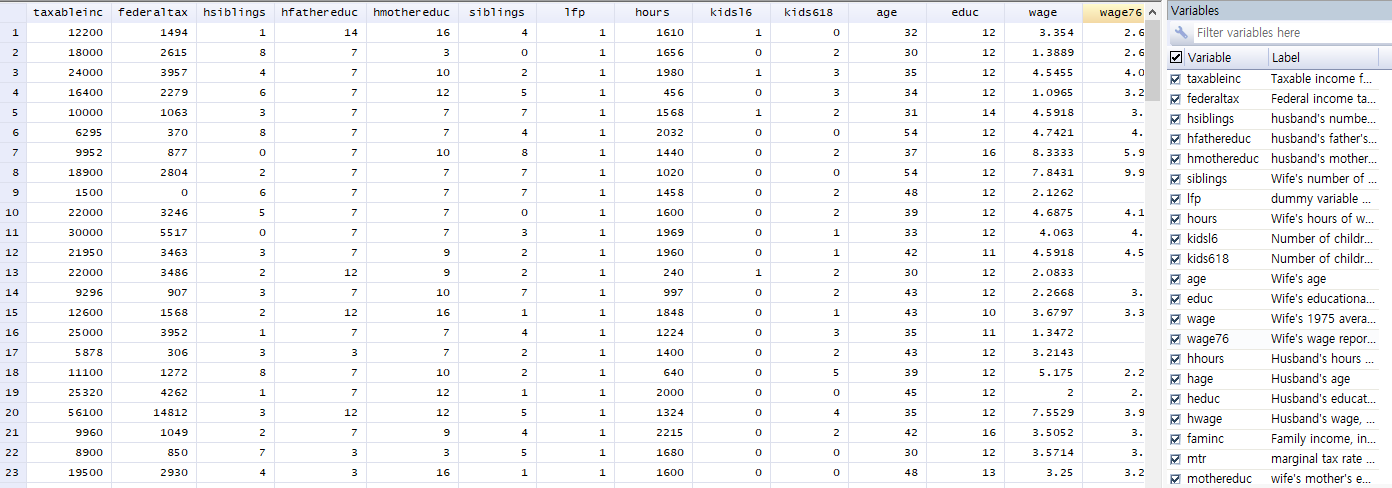


> **실습**
- wage 결측치 제거 후
- wage 로그변환 변수 생성
- exper의 경우 제곱값을 변수로 생성
- 로그변환한 wage(종속변수)와 educ, exper ,제곱변환한 exper를 회귀분석 시도

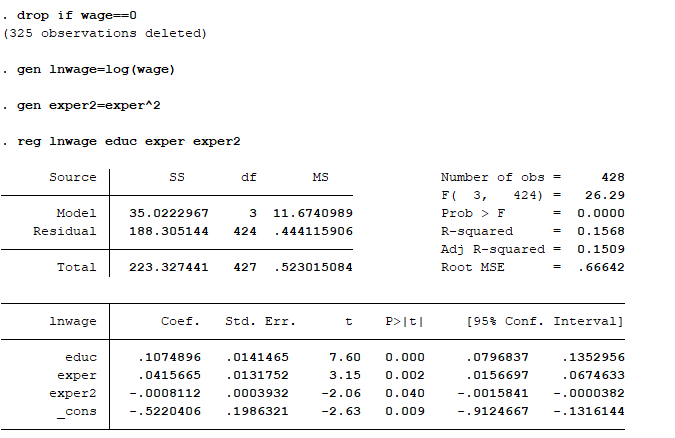

- (관찰되지 않는) 능력 변수가 누락가능성 도구 변수(IV)로 아버지의 교육수준(fathereduc)을 이용하여 2SLS 추정하자.

- ivregress 2sls 명령어를 사용하면, 1,2단계를 따로하지 않고 명령어 패키지로 해결할 수 있음

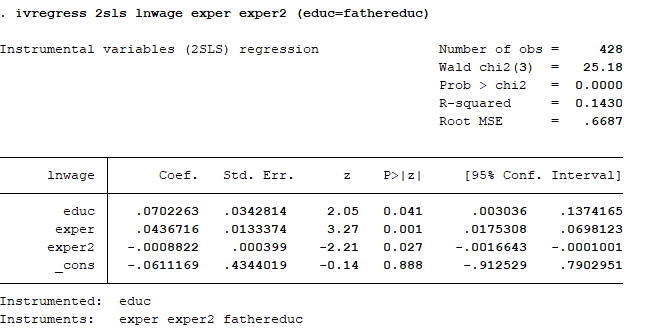

- 직접 1,2단계로 나누어 추정해보기

- reg educ exper exper2 fathereduc (1단계로 내생적 변수인 "educ" 추정)

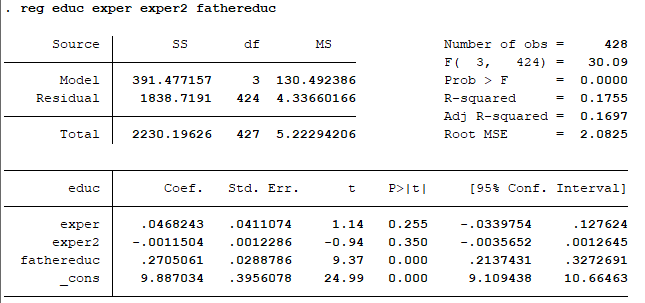



- predict educ_hat (educ의 추정치인 $\hat{educ}$ 산출)

- reg lnwage educ_hat exper exper2 (educ대신 추정치인 educ_hat를 설명변수로 이용하여 2단계 추정

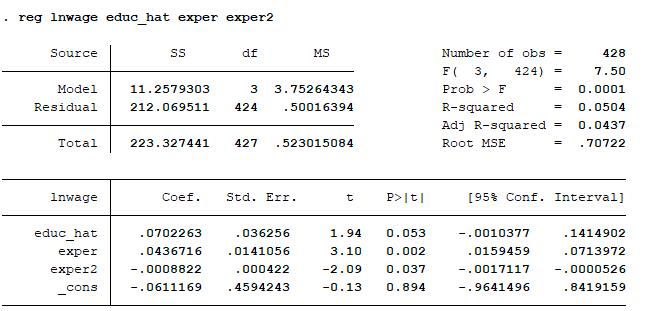

도구변수(IV)로 어머니의 교육수준(mothereduc)을 이용하여 2SLS 추정하기

- ivregress 2sls lnwage exper exper2 (educ=mothereduc)

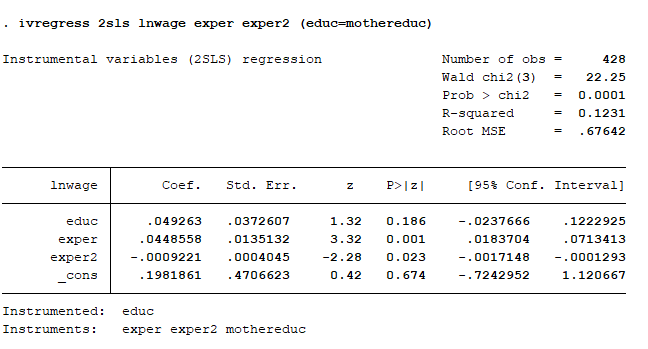

**어느 도구변수가 더 적합한지 3가지 방식을 통해 확인해보자**

(방식 1) 내생적 설명변수와 상관관계 점검

- corr educ fathereduc mothereduc

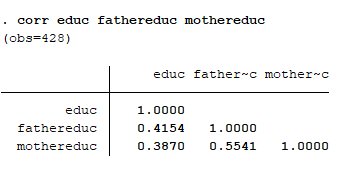

(방식 2) 1단계 "educ"과 추정결과 비교해보기

- reg educ exper exper2 fathereduc
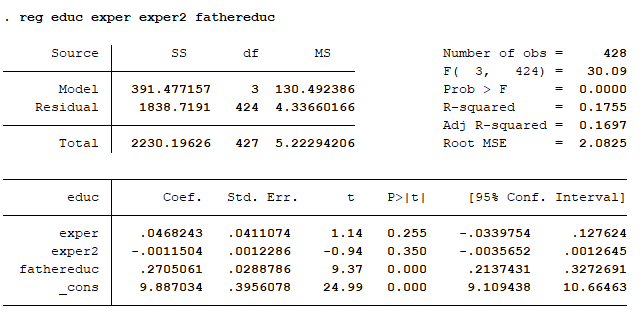

- reg educ exper exper2 mothereduc

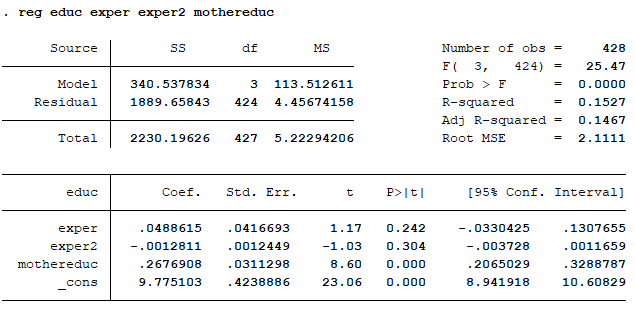

(방식 3) 도구변수의 적합성을 F 검정

- qui ivregress 2sls lnwage exper exper2 (educ=fathereduc)

- estat first

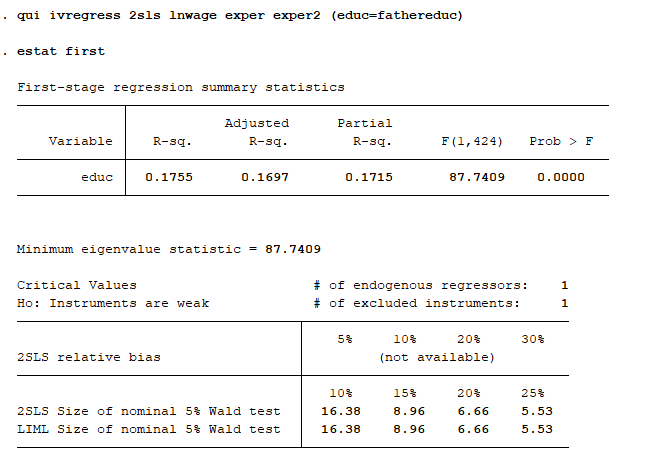

- qui ivregress 2sls lnwage exper exper2 (educ=mothereduc)

- estat first

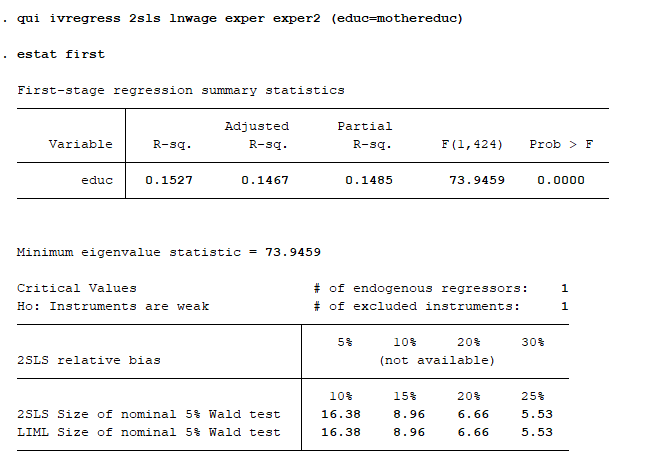



**주의** * 도구변수의 적합성 F검정 시 반드시 윗줄의 ivregress를 먼저 수행할 것

도구변수를 두 개 이용할 수도 있음

- ivregress 2sls lnwage exper exper2 (educ=fathereduc mothereduc)

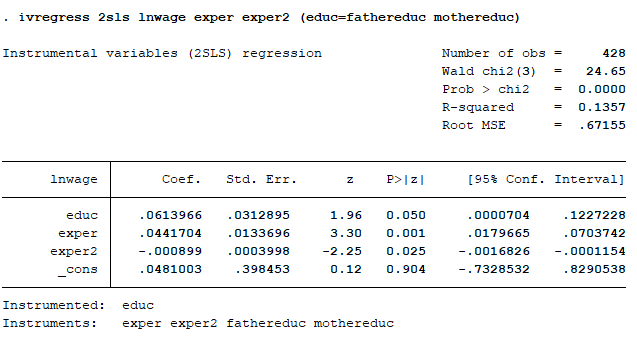

- estat first

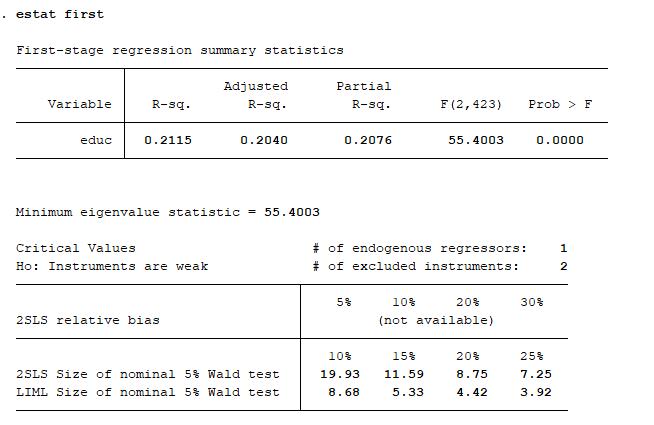

설명변수 "educ"가 과연 내생적인지 가설검정할 필요가 있음. (3가지 방식 가능)

(방식 1) Hausman 검정

- qui ivregress 2sls lnwage exper exper2 (educ=fathereduc mothereduc)

- estimates store iv : 2SLS 추정결과 저장

- qui reg lnwage educ exper exper2

- estimates store ols: OLS 추정결과 저장

- hausman iv ols, constant sigmamore: 하우스만 검정

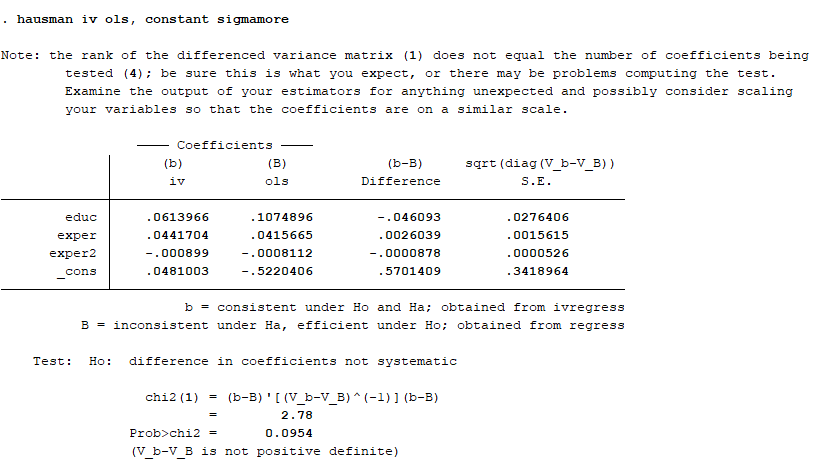

(방식 2) Hausman 검정을 다음과 같이 2단계로 확인 가능

- reg educ exper exper2 fathereduc mothereduc: 1단계로 내생적 변수인 "educ" 추정

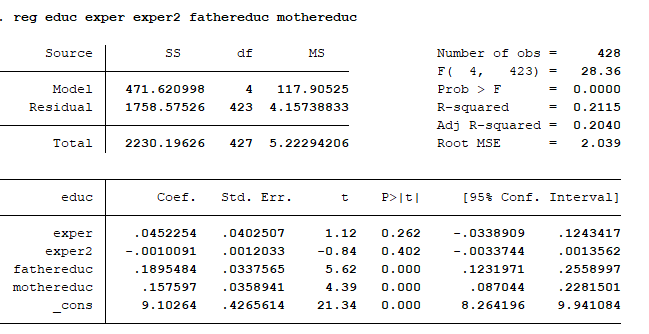

- predict educ_hat1, resid: 이 모형의 잔차변수 "educ_hat1" 산출

- reg lnwage educ_hat1 educ exper exper2: "educ_hat1"과 "educ"을 모두 설명변수로 포함하여 2단계 추정 후 "educ_hat1"의 추정계수의 p값이 (방식 1)의 Hausman 검정통계량의 p값과 일치함을 확인

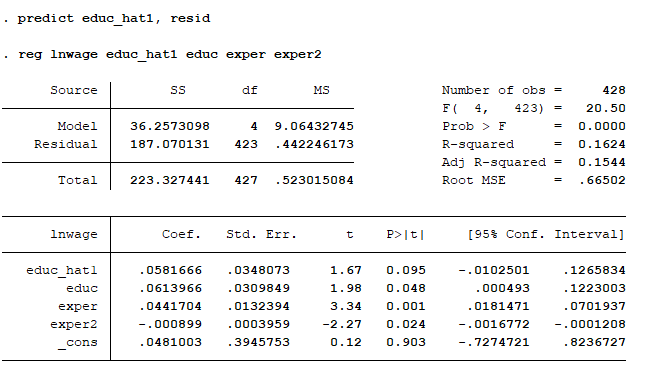

(방식 3) Durbin chi2와 Wu-Hausman F값을 이용한 내생성 검정

- qui ivregress 2sls lnwage exper exper2 (educ=fathereduc mothereduc)

- estat endogenous

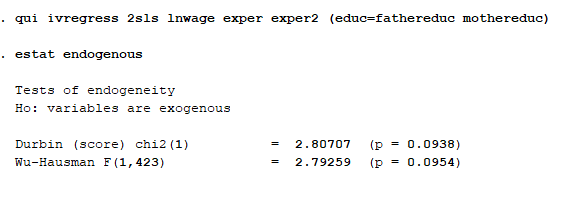

선형회귀모형과 관련된 검정: Chow 검정
--

Chow 검정: 시계열 모형에서 **특정시점 전후**로 **모형의 계수에 구조적 변화**가 있는지 검정 

전체 표본기간을 두 기간으로 나눈 후 각 기간에 대한 선형회귀모형 추정 후 설명변수의 계수가 서로 같은지 검정

- 전체 기간에 대한 선형회귀모혀은 다음과 같음

$ y_t= \beta_0 +\beta_1 x_{1t}+\beta_2 x_{2t} +e_t$, 

$t=1, \cdots, T_1, T_1 +1, \cdots, T$

- 만약 $T_1$ 시점을 전후로 구조적 변화 (예컨대 1997년 외환위기)가 있다면

$ y_t= \gamma_0 +\gamma_1 x_{1t}+\gamma x_{2t} +v_t$, 

$t=1, \cdots, T_1$

$ y_t= \theta_0 +\theta_1 x_{1t}+\theta x_{2t} +u_t$, 

$t=T_{1} + 1, \cdots, T$

- Chow 검정의 귀무가설은 다음과 같음.

$H_0: \gamma_0 = \theta_0, \gamma_1=\theta_1, \gamma_2=\theta_2 $ : 차이가 없다.

- Chow 검정통계량은 다음과 같음

$$ Chow = \frac{\frac{(SSE_T - (SSE_1 + SSE_2))}{k}}{\frac{(SSE_1+ SSE_2)}{(T_1+T_2-2k}} \sim F(k, T_1 + T_2 - 2k) $$ 

- 기각하면 각 추정 계수가 다르다는 의미 (ex: $\gamma_0 \neq \theta_0$)

- 여기서 $SSE_T$는 전체기간에 대한 모형의 잔차제곱합(SSE), $SSE_1$과 $SSE_2$는 각각 기간 $T_1$과 $T_2$에 대한 모형의 $SSE$, $k$는 상수항을 포함한 설명변수의 수


IN STATA(Chow 검정 실습)
--

**데이터 미리보기**

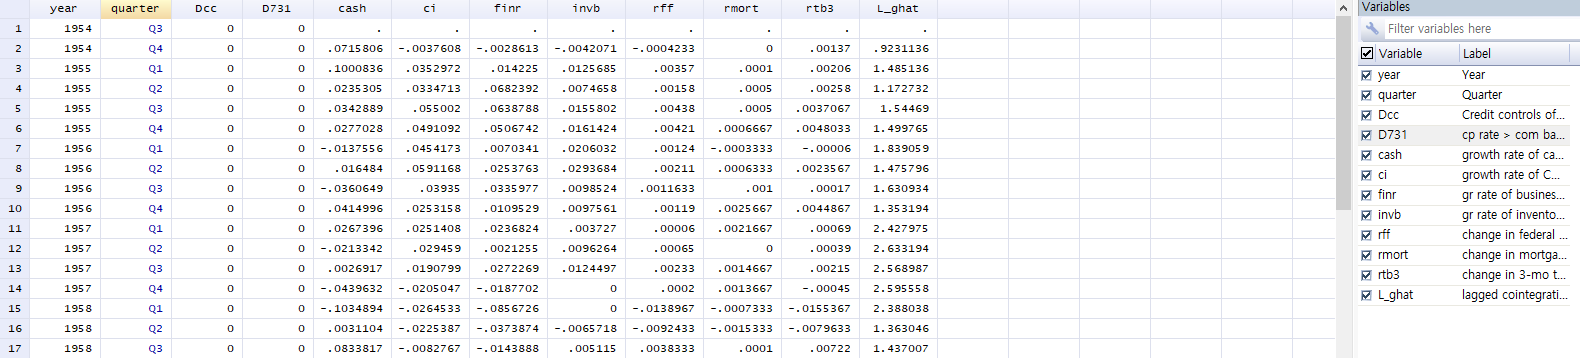

**데이터 설명**

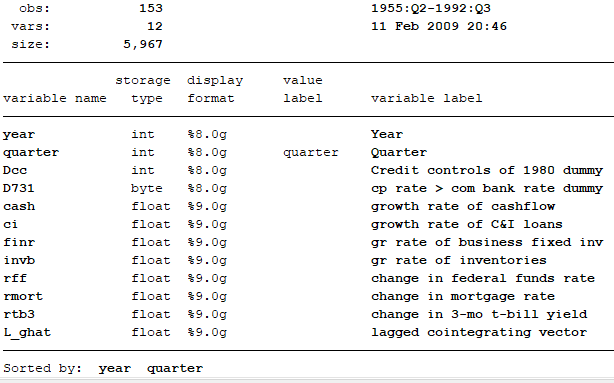

gen date = yq(year, quarter): "year" 및 "quarter" 변수를 이용하여 날짜변수 "date" 생성

format date %tq: 포맷을 1954q3, 1954q4, ... 으로 바꿈 (년도별로 분기별로 표시)

tsset date: date칼럼은 시간 타입입니다.

reg ci invb rff: 전체기간에 대한 회귀분석, 종속변수: ci(기업대출 증가율), 독립변수: invb(재고증가율), rff(연방기금금리 변화폭)

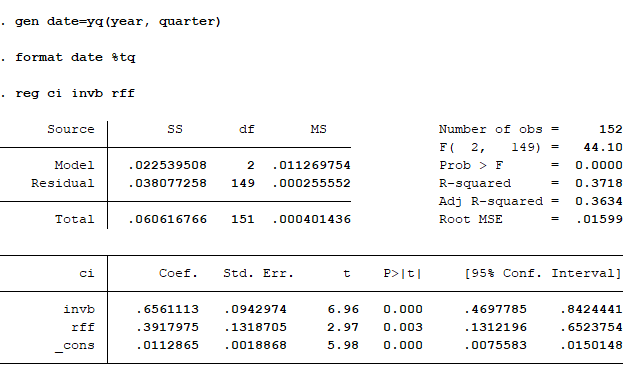


scalar s_c=e(rss): 전체기간에 대한 SSE 산출

reg ci invb rff if date<q(1980Q1): $T_1$기간에 대한 회귀분석

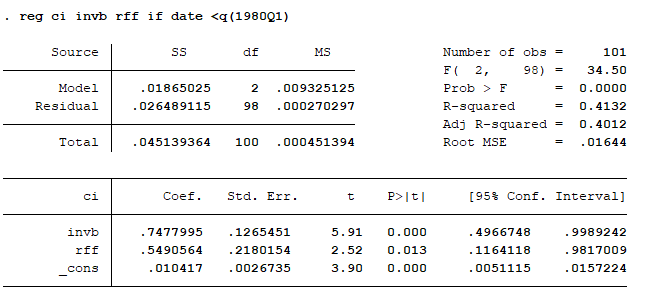




scalar s_1=e(rss): $T_1$ 기간에 대한 SSE 산출

reg ci invb rff if date >= q(1980Q1): $T_2$ 기간에 대한 회귀분석

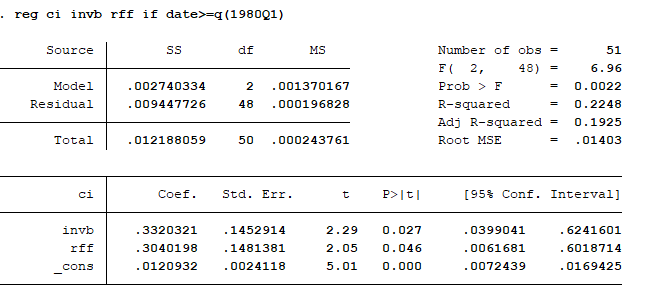




scalar s_2=e(rss): $T_2$ 기간에 대한 SSE 산출

scalar chow1=$\frac{(s_c-(s_1+s_2))}{3}$

scalar chow2=$\frac{(s_1+s_2)}{101+51-6}$

scalar chow3=$\frac{chow1}{chow2}$: Chow 검정 통계량 계산

di chow: Chow 검정통계량 보이라

di Ftail(3,146, chow3): p-value 보이라(5% 유의수준에서 귀무가설 기각)

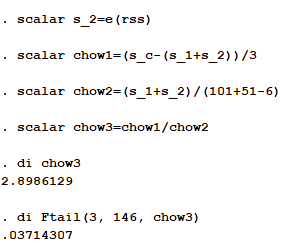

더미변수를 이용한 검정(1980년 1사분기에 구조적 변화가 있었는지 검정)

- gen dum_1980=date>=q(1980Q1): 더미변수 "dum_1980"(1980Q! 이후이면 1, 아니면 0) 생성

- gen dum_invb=dum_1980*invb: invb와 더미변수의 상호작용변수 생성

- gen dum_rff=dum_1980*rff: rff와 더미변수의 상호작용변수 생성

- reg ci dum_1980 invb dum_invb rff dum_rff

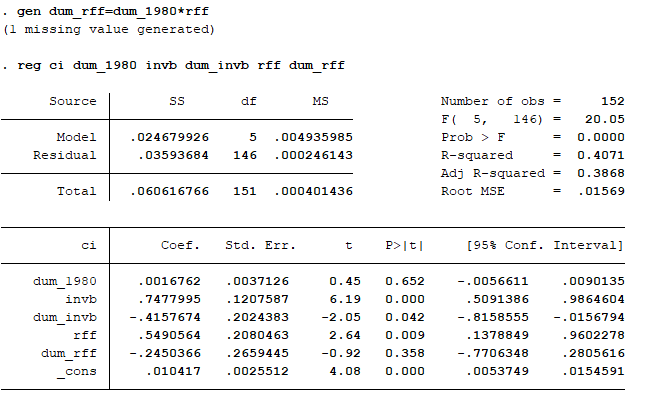


- test dum_1980 dum_invb dum_rff: $H_0: dm_1980=0, dum_invb=0, dum_rff=0$에 대한 F 검정하라(검정결과가 Chow 검정통계량과 정확히 일치함을 확인하라.)

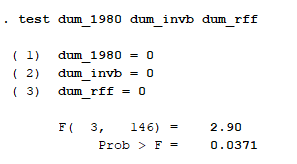


특정변수(예컨대 invb)만을 대상으로 구조적 변화가 있었는지 검정하려면 해당변수의 상호작용(즉 dum_invb)만을 추정모형에 포함

- reg ci invb dum_invb rff

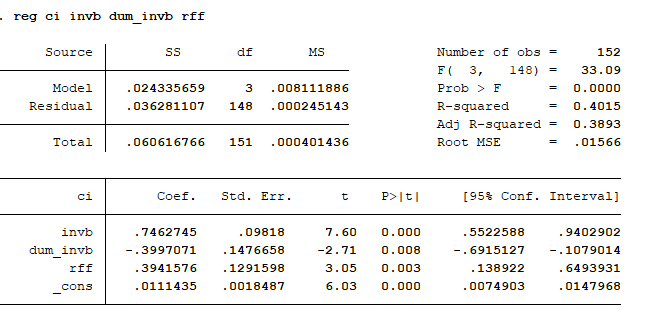


- test dum_invb: 귀무가설 기각(1980년 이전과 이후에 invb 계수가 달라졌음을 의미)


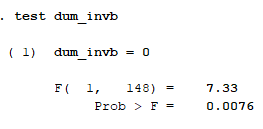

2차 모형
--

$y=\beta_0 + \beta_1 x \beta_2 x^2 + e$

- 설명변수(x)와 종속변수(y) 간에는 비선형(nonlinear)이지만 모수에 대해서는 선형이므로 다중회귀선형모형(OLS로 추정가능)

- Q. 2차모형을 사용하게 되면 $x, x^2$ 간에 다중공선성 문제가 생기지 않나요? (실제 수업 때 한 학생이 한 질문)

- A. 좋은 질문입니다. 2차 모형에서 다중공선성 문제 해결방안은 $x, x^2$ 간 상관관계를 확인, vif 값 확인 후 기존의 설명변수 대신 설명변수의 편차(deviation)을 새로운 설명변수로 사용합니다. $y=\beta_0 + \beta_1 x + \beta_2 x^2 +e$ 대신 $ y=\gamma_0 + \gamma_1 (x_1 - \bar{x}) + \gamma_2 (x- bar{x})^2 + v$ $\Rightarrow$ 변수 - (변수의 평균)을 새로운 변수로 부여후 제곱항 생성 후 편차를 이용한 회귀분석을 통해 다중공선성을 완화합니다.

IN STATA(2차 모형) 실습
--

**데이터 미리보기**

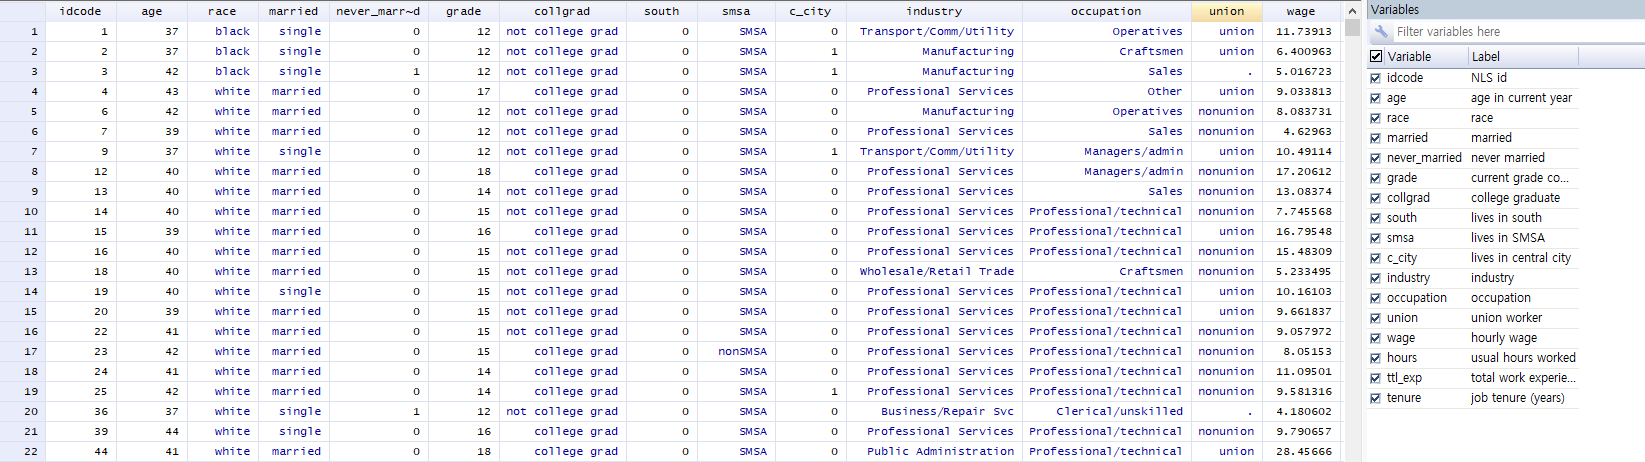

**데이터 설명**

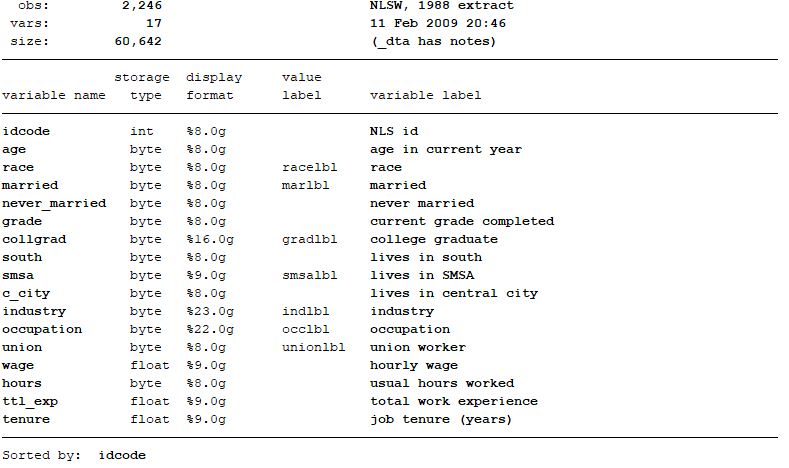

제곱항 생성후 종속변수인 wage(임금)에 자연로그를 씌우고 2차 모형 추정하기

di -_b[tenure]/(2*_b[tenure2]): 임금이 피크가 되는 연차 산출 

su tenure if e(sample)==1: "tenure" 변수의 기초통계표를 산출하라. if e(sample)==1은 마지막으로 추정한 모형에 사용된 자료에 대해서 산출하라는 의미

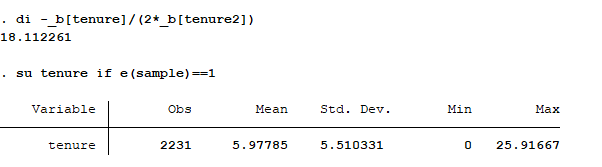



di 2*_b[tenure2]*r(mean)+_b[tenure]: "tenure" 변수 평균(5.97년) 기간 동안 일한 근로자가 1년 더 근무할 때 임금이 평균적으로 약 4.0% 증가한다는 의미. r(mean)은 mean(평균치)을 return(산출)하라는 명령어

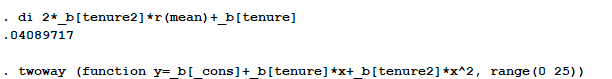

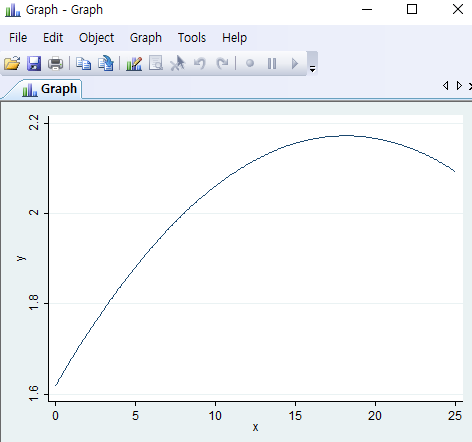

회귀모형에 또 다른 설명변수(ttl_exp) 추가

- reg lwage tenure tenure2 ttl_exp

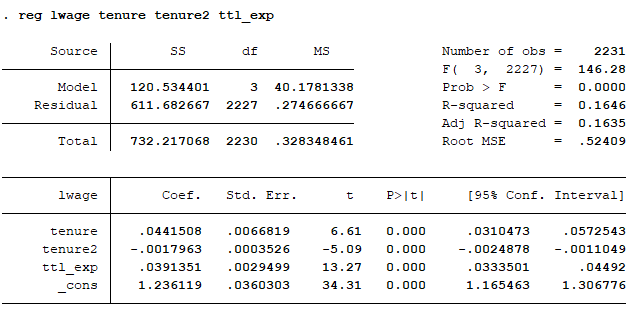

- su ttl_exp if e(sample)==1 : 마지막으로 추정한 회귀모형에 이용된 "ttl_exp" 변수자료의 기초통계표를 산출

- di -_b[tenure]/(2*_b[tenure2]): 임금이 피크가 되는 연차 산출

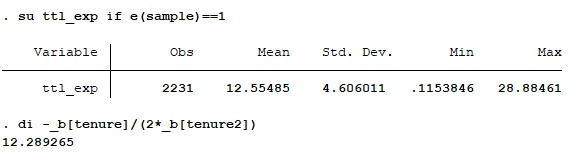


twoway (function y=_b[_cons]+_b[tenure]*x+_b[tenure2]*x^2+_b[ttl_exp]*12.55, range(0 25)): ttl_exp(총 근무연한)을 12.55년에 고정시키고 2차 함수를 그리시오.

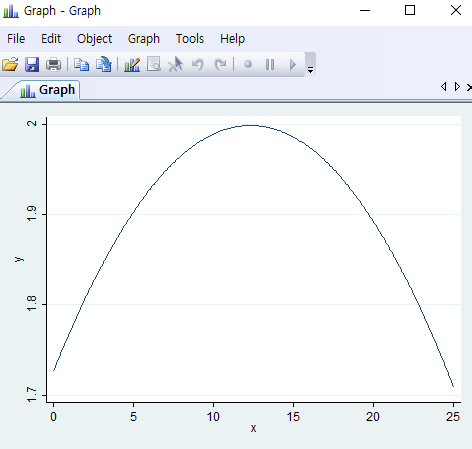


2차 모형에서 다중공선성 문제 해결방안
- tenure와 tenure2 간 다중공선성 검정

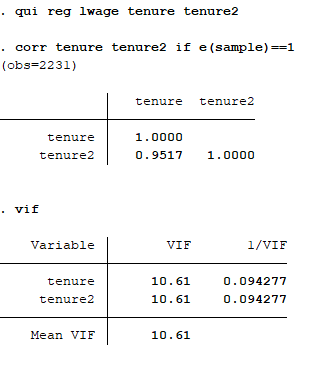

해결방안: 기존의 설명변수 대신 설명변수의 편차를 새로운 설명변수로 사용


gen tenure_d=tenure-r(mean): "tenure"의 편차 생성

gen tenure_d2=tenure_d^2: 제곱합 생성

reg lwage tenure_d tenure_d2: 편차를 이용한 회귀분석

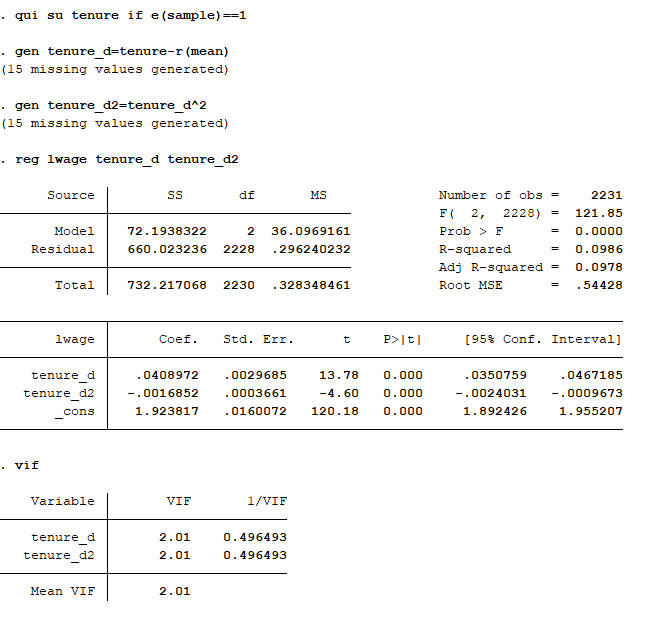



vif 결과를 보면, 다중공선성이 완화된 것을 확인할 수 있다.


단계적 회귀

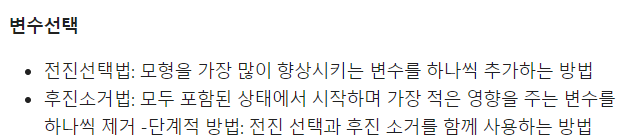

**R의 경우, step 함수를 활용**

step(lm(종속변수$\sim$설명변수, 데이터세트), score=list(lower=$\sim$1, upper=$\sim$설명변수), direction="변수선택방법") 함수로 변수를 쉽게 선택 할 수 있다. (AIC기준으로 변수선택법이 이루어짐.)
(direction= forward, backward, both)

**Stata의 경우, stepwise를 사용**

 유의수준 n에서 유의한 변수를 남기거나, 가장 작은 모형에서 출발하여 유의한 변수들을 하나씩 추가시키거나, 더미변수를 생성 후, 설명변수에 포함하여 단계적 회귀분석을 실시한다. (pr(0.05): 유의수준 0.05에서 유의한 변수만 남겨라, pe(0.05): 유의한 변수들을 하나씩 추가시켜나가라, xi: stepwise, pr(0.05): 더미변수 생성후 단계적 회귀분석)**

많은 설명변수 중에서 어떤 변수를 모형에 포함해야 할지 결정하기 힘들 때, 


**데이터 설명**

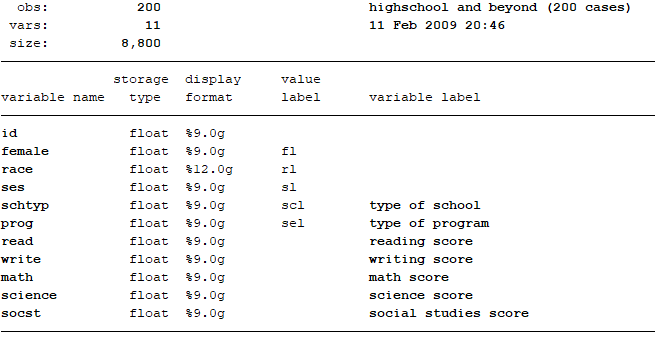

**stepwise, pr(0.05): reg write read science female: stepwise는 단계적 회귀모형 의미, pr(0.05)는 설명변수 3개(read, science, female)를 모두 포함한 모형에서 시작하여 유의수준 0.05에서 유의한 변수만 남겨라.**

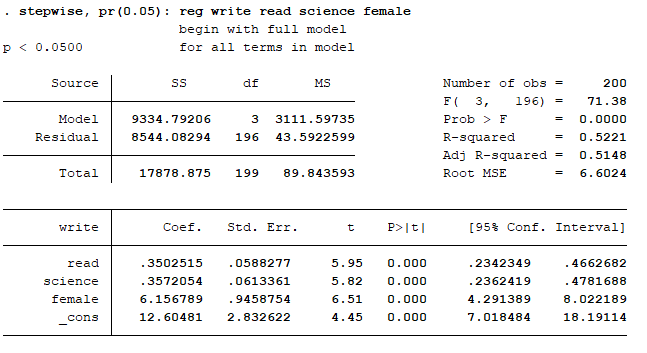


**stepwise, pe(0.05): reg write read science female: pe(0.05)는 가장 작은 모형에서 출발하여 유의한 변수들을 하나씩 추가시켜 나가는 방식**

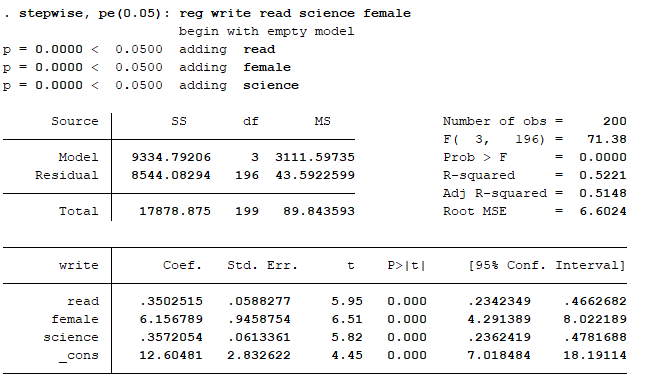

**xi: stepwise, pr(0.05): reg write I.ses read science female: "ses" 변수(상,중,하)에 대해 더미변수를 생성하고 설명변수에 포함하여 단계적 회귀분석하라**

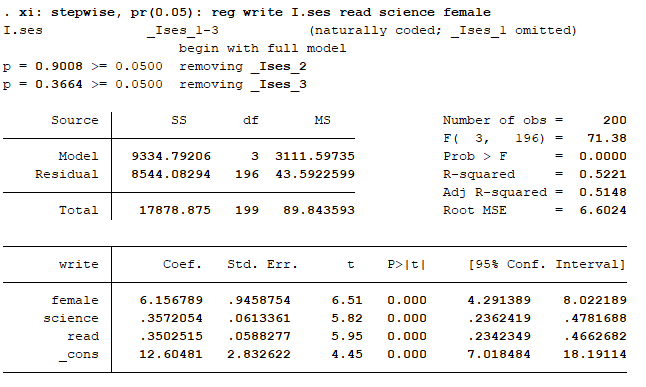

**xi: by schtyp, sort:stepwise, pr(0.05): reg write I.ses read science female: "schtyp" 범주형 변수의 각 범주(공립학교, 사립학교)에 대해 각각 추정하고자 할 때**

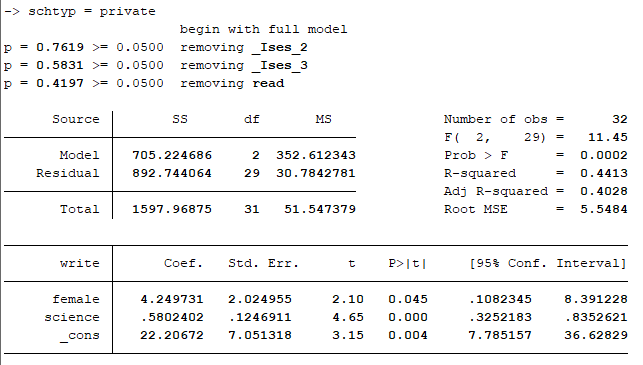